In [9]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


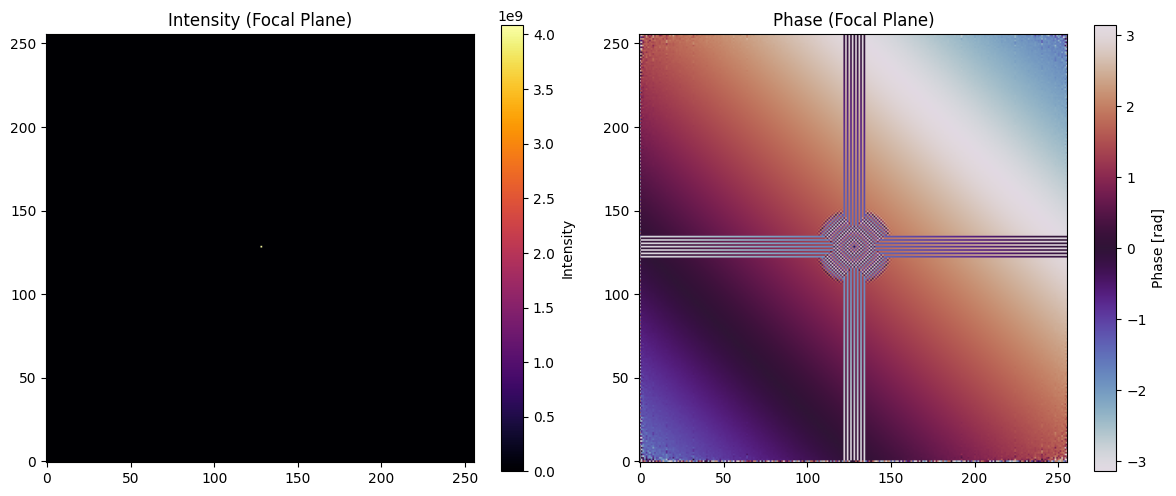

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from pathlib import Path

# Add the project root directory to Python path
project_root = Path.cwd().parent  # Adjust this if your notebook is in a different location
sys.path.append(str(project_root))

# Now import using absolute import
from src.beam_propagator import propagate_beam

# Parameters
N = 256  # Grid size
wavelength = 500e-9  # 500 nm (visible light)

# Create a simple phase screen: e.g., a Gaussian bump
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)
phase_screen = 2 * np.pi * 0.2 * np.exp(-(X**2 + Y**2) / 0.1)  # phase in radians

# Propagate the beam
result = propagate_beam(wavelength, phase_screen)

# Visualize the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Intensity (Focal Plane)")
plt.imshow(result.intensity, cmap='inferno', origin='lower')
plt.colorbar(label='Intensity')

plt.subplot(1, 2, 2)
plt.title("Phase (Focal Plane)")
plt.imshow(result.phase, cmap='twilight', origin='lower')
plt.colorbar(label='Phase [rad]')

plt.tight_layout()
plt.show()